# Data cleaning for telco customer churn

This will include basic checks of data (data types, n/a values) and cleaning

In [144]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()


In [145]:
# intialise dataframe
file_path = r"..\data\raw\telco-customer-churn.csv"
df = pd.read_csv(file_path)

#### Get information about the data

In [ ]:
df.info()

print("-+"*50)

7043 observations, and 7043 non-null values for each feature so there are no missing values.<br>Most features are of the object type (yes/no), so I will have to convert that to 1/0, as  most machine learning alogrithms work with numerical data and it simplifies mathemtical operations / statistical analysis.

#### Clean data

In [170]:
# drop uneccessary data 
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])


# converting object types 

# convert object type data where values are yes/no to 1/0 
# get all object columns
object_columns = df.select_dtypes(include=["object"]).columns
# filter columns for features with only yes or no
for col in object_columns:
    if df[col].isin(["Yes", "No"]).all():
        df[col] = df[col].replace({"Yes": 1, "No": 0})

# convert totalcharge to float - there was an error when doing it straight away, indicating there are missing entries we didn't find first
# drop rows with missing total charges (around 20) 
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df = df.dropna(subset=['TotalCharges']) #
df.TotalCharges = df.TotalCharges.astype(float)


# remaining objects will be encoded via one hot encoding and then convert bool to int 
categorical_columns = ["gender", "InternetService", "Contract", "PaymentMethod", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
existing_columns = []
for col in categorical_columns:
    if col in df.columns:
        existing_columns.append(col)
if len(existing_columns) > 0:        
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True) # drop first column during dummy vairable creation to prevent multicollinearity and avoid redudancy

bool_columns = df.select_dtypes(include=["bool"]).columns
for col in bool_columns:
    if df[col].isin([True, False]).all():
        df[col] = df[col].replace({True: 1, False: 0})

df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender_Male                            7032 non-null   int64  
 10  InternetService_Fiber optic            7032 non-null   int64  
 11  InternetS

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

#### Check for outliers

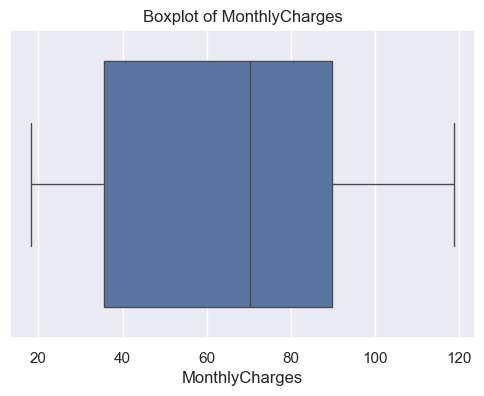

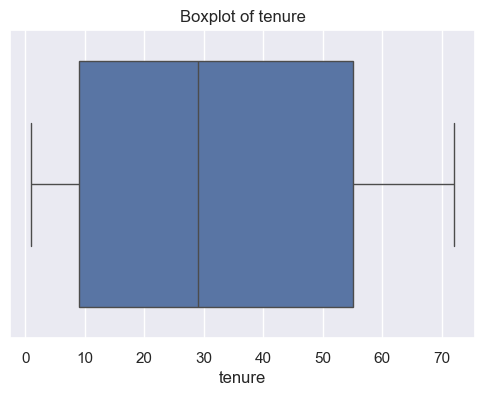

In [172]:
# visualise outliers for numerical data
numerical_cols = ["MonthlyCharges", "tenure"] # don't include total charges as it is dependent
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

No immediate outliers for the numerical data.

In [171]:
# save cleaned data
file_path = r"..\data\processed\cleaned-telco-customer-churn.csv"
df.to_csv(file_path)

#### Cleaing and preprocessing is now "complete":
- Binary Encoding: Done for binary features like Partner, Dependents
- One-Hot Encoding: Done for cateogorical variables 
- Removed redundant columns

The dataset is now ready for EDA

However, this is an iterative process, and some features may need extra tweaking, especially when modelling, hence why complete is in quotation marks